---
title: Homework 4
jupyter: python3
---


This assignment will continue to use the American Community Survey (ACS) from the US Census.
You will need to refer to the documentation to know what the ACS variable names mean. You can find a copy of the codebook in the [Lab 4 folder on Google Drive](https://drive.google.com/drive/u/0/folders/1jkY0mTxBhwOvvCJE_CJ3LWiOr_9V1ojZ)


In [16]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None

In [17]:
acs = pd.read_csv("./pums_short.csv.gz")

## Question 1: Working with missing data

### Q1.a

In the previous lab we counted the number of missing values for the `"RNTP"` column using

In [18]:
rntp_sum = acs["RNTP"].isna().sum()
valp_sum = acs["VALP"].isna().sum()
print("RNTP Sum: ",rntp_sum, "VALP Sum: ", valp_sum)

RNTP Sum:  202728 VALP Sum:  97644


Repeat for the `"VALP"` column. (If you want, you can compute both totals simultaneously.)

Print out the total number of rows in the `acs` table. What do you notice about the total number of rows and the sum of the missing values for these two columns?



In [19]:
print("Number of rows:", len(acs))
print("Number of total missing rows in RNTP and VALP: ", rntp_sum + valp_sum)


Number of rows: 276632
Number of total missing rows in RNTP and VALP:  300372


Q1a: The total number of rows is less than the number of missing rows in the RNTP and VALP columns. Note can also be taken on the fact that the rows missing in RNTP and VALP do not correlate with eachother. It can also be presumed that over half of the values are missing for one of the two columns




### Q1.b

Write a single line of code that proves that 100% of observations are missing either the `"VALP"` or `"RNTP"` measurements.


In [20]:
missing_either = (acs["VALP"].isna() | acs["RNTP"].isna()).mean() == 1
print(missing_either)


True




### Q1.c

The `.dropna()` method has a `subset = ['column1', 'column2']` argument that allows you to indicate which columns your want to use to control how rows are dropped from the result.

Create a table called `owners` that only includes households that have non-missing `"VALP"` entries. Print out the number of rows in this table and verify it matches the number of observations with *non-missing* `"VALP"` entries in `acs`. Hint:

In [21]:
hint = pd.Series([True, False, False, True])
owners = acs.dropna(subset=['VALP'])
print(len(owners) == (len(acs) - valp_sum))

True


### Q1.d

Using the `owners` table, what **proportion** of rows are missing `"HINCP"` values?

Find the median value of the non-missing values (hint: built in Panadas methods automatically drop missing values).

Using the `.fillna(VALUE, inplace = TRUE)` method, update the `"HINCP"` column of the `owners` table by making any missing values equal to median of the non-missing values.

Verify by showing that all of the values are not missing for `"HINCP"`.



In [22]:
# Proportion missing in "HINCP"
prop_missing = owners["HINCP"].isna().mean()
print(prop_missing)

# Fill missing "HINCP" with median
median_hincp = owners["HINCP"].median()
owners["HINCP"].fillna(median_hincp, inplace=True)

# Verify no missing "HINCP"
print(owners["HINCP"].isna().sum())


0.01331932867007844
0




### Q1.e

Repeat the above steps to create a table `renters` that contains only rows for people who are renting (have non-missing `RNTP` values) and median impute any missing `HINCP` values.

For both `owners` and `renters` compute the following quantities for the "HINCP" column.
- mean
- median
- IQR
- standard deviation

Which group has the higher location values? Which group has more spread? Comment briefly on what this means.



In [23]:
# Create renters table (non-missing "RNTP")
renters = acs.dropna(subset=['RNTP'])

# Proportion missing in "HINCP"
prop_missing_renters = renters["HINCP"].isna().mean()
print(prop_missing_renters)

# Fill missing "HINCP" with median
median_hincp_renters = renters["HINCP"].median()
renters["HINCP"].fillna(median_hincp_renters, inplace=True)

# Verify no missing "HINCP"
print(renters["HINCP"].isna().sum())

# Compute summary statistics for "HINCP"
for group in [owners, renters]:
    mean = group["HINCP"].mean()
    median = group["HINCP"].median()
    iqr = np.percentile(group["HINCP"].dropna(), 75) - np.percentile(group["HINCP"].dropna(), 25)
    std_dev = group["HINCP"].std()

    print(f'Mean: {mean}, Median: {median}, IQR: {iqr}, Std Dev: {std_dev}')
print("The higher mean and median for homeowners suggest that people who own homes generally have higher incomes. However, the greater spread in income (larger IQR and standard deviation) among homeowners indicates that while many homeowners earn significantly more, there is also a wider range of incomes within this group. This suggests that homeowners include both relatively lower-income individuals and much higher-income individuals. In contrast, renters tend to have more similar incomes, which are generally lower, with less variability across the group.")


0.056329833297250484
0
Mean: 103101.59041946946, Median: 75000.0, IQR: 85100.0, Std Dev: 107811.39422510703
Mean: 56607.35456808833, Median: 40000.0, IQR: 49600.0, Std Dev: 64594.46491847602
The higher mean and median for homeowners suggest that people who own homes generally have higher incomes. However, the greater spread in income (larger IQR and standard deviation) among homeowners indicates that while many homeowners earn significantly more, there is also a wider range of incomes within this group. This suggests that homeowners include both relatively lower-income individuals and much higher-income individuals. In contrast, renters tend to have more similar incomes, which are generally lower, with less variability across the group.




## Question 2: More on distributions

### Q2.a Distributions of number of people in the household

Create a histogram of the number of people in the household (`NP`) for the `acs` data. Use the `bins` argument to create a histogram with 20 bins. Briefly discuss the location, spread, and skew of the distribution.


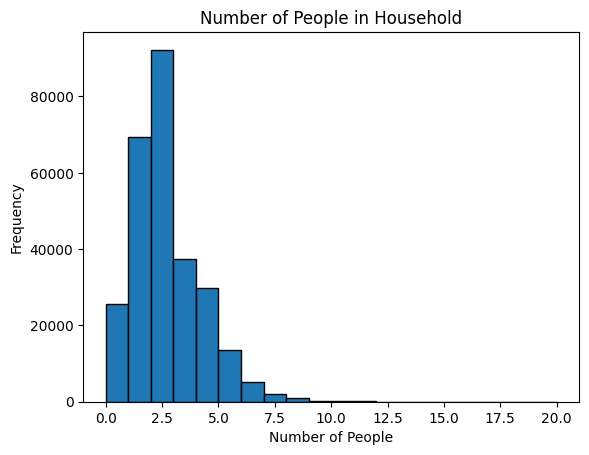

In [24]:
# Plot histogram for "NP"
plt.hist(acs["NP"], bins=20, edgecolor='black')
plt.title('Number of People in Household')
plt.xlabel('Number of People')
plt.ylabel('Frequency')
plt.show()

Location:
The majority of households have between 1 to 3 people, with the peak around 2 people per household. This suggests that small households are the most common in the dataset.
Spread:
The number of people in households ranges from 1 to about 20, but most households have fewer than 6 people. The data is concentrated in the lower range, with a sharp drop-off after 5 people per household.
Skew:
The distribution is right-skewed (positively skewed), meaning there are a small number of households with many people (greater than 5), but these are less common.
In summary, the histogram shows that small households (1 to 3 people) are most typical, and there are fewer large households, creating a right-skewed distribution.


### Q2.b Summaries of `NP`

Check your answers to the previous question by computing the mean, median, IQR, standard deviation, quantile skewness using the 0.25 and 0.75 quantile, and the coefficient of skewness of the `NP` column.


In [25]:
# Summaries of NP
mean_np = acs["NP"].mean()
median_np = acs["NP"].median()
iqr_np = np.percentile(acs["NP"].dropna(), 75) - np.percentile(acs["NP"].dropna(), 25)
std_np = acs["NP"].std()
quantile_skewness = (acs["NP"].quantile(0.75) - acs["NP"].quantile(0.25)) / (2 * std_np)
coefficient_skewness = 3 * (mean_np - median_np) / std_np

print(f'Mean: {mean_np}, Median: {median_np}, IQR: {iqr_np}, Std Dev: {std_np}, Quantile Skewness: {quantile_skewness}, Coefficient Skewness: {coefficient_skewness}')


Mean: 2.208764712686891, Median: 2.0, IQR: 2.0, Std Dev: 1.5263892280571307, Quantile Skewness: 0.6551408917323487, Coefficient Skewness: 0.4103109000958116


Based on the results my summary was relatively accurate.


### Q2.c Comparing conditional distribution of NP for owners and renters

Create a side-by-side boxplot of the number of people in the household for owners and renters. What do you notice about the distributions of the number of people in the household for owners and renters?


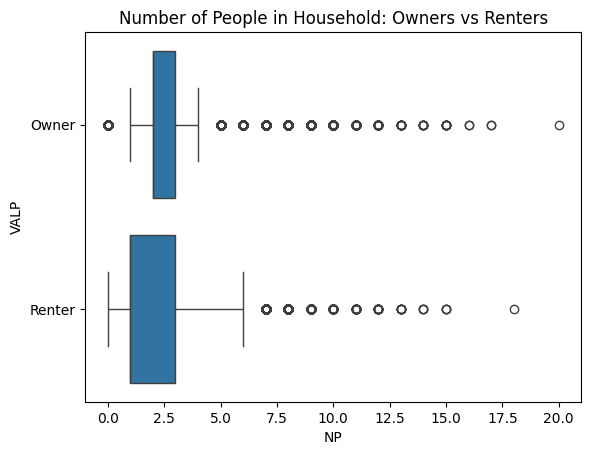

In [26]:
# Create boxplot for owners and renters
sb.boxplot(data=acs, x="NP", y=acs["VALP"].notna().replace({True: "Owner", False: "Renter"}))
plt.title('Number of People in Household: Owners vs Renters')
plt.show()

This suggests that while the typical household size is similar for both groups, homeowners are more likely to have very large households (as indicated by the outliers), whereas renters tend to have a wider spread of smaller to mid-sized households. Renters show more variability within the typical range (1-4 people), while homeowners have more extreme values (households with many more people).


### Q2.d Effect size of the difference in means

Compute the effect size of the difference in means of the number of people in the household for owners and renters. Use the formula for Cohen's $d$

$$d = \frac{\bar X_1 - \bar X_2}{S_p}$$

where $\bar X_1$ and $\bar X_2$ are the means of the two groups and $S_p$ is the pooled standard deviation.

Using the following table of effect sizes, how would you interpret the effect size of the difference in means of the number of people in the household for owners and renters?

| Effect size | Interpretation |
|-------------|-----------------|
| (0, 0.2]    | Small           |
| (0.2, 0.5]  | Medium          |
| (0.5, 0.1]  | Large           |
| (1, 2]      | Very large      |




In [27]:
# Compute Cohen's d
mean_owners = owners["NP"].mean()
mean_renters = renters["NP"].mean()

std_owners = owners["NP"].std()
std_renters = renters["NP"].std()

pooled_std = np.sqrt(((len(owners) - 1) * std_owners**2 + (len(renters) - 1) * std_renters**2) / (len(owners) + len(renters) - 2))
cohens_d = (mean_owners - mean_renters) / pooled_std

print(f'Cohen\'s d: {cohens_d}')


Cohen's d: 0.20477751312029022


Based on Cohen's d, this effect size is considered Medium. The difference in the mean number of people in households between owners and renters is statistically small, although it is noticeable.
This suggests that while there is a difference in household size between owners and renters, it is not a large effect and likely not substantial in a practical sense. In other words, homeowners and renters have similar average household sizes, with only a slight difference between the two groups.


## Question 3: More on means and medians

For this problem, we will investigate some theoretical properties of means and medians.

### Q3.a

We have already seen that the mean is the unique point $\bar X$ that makes $\sum_{i=1}^n (X_i - \bar X) = 0$. While we didn't introduce it as such, it is also the case that $\bar X$ is the point that **minimizes** $\sum_{i=1}^n (X_i - \bar X)^2$, the sum of squared deviations.

Using the `HINCP` column of the `acs` data, demonstrate that the sum of squared deviations from the mean is less than the sum of squared deviations from the median ($\sum_{i=1}^n (X_i - \tilde X)^2$).

Recall that `x**2` is how we square things in Python.

In [28]:
# Compare sum of squared deviations from mean and median
mean_hincp = acs["HINCP"].mean()
median_hincp = acs["HINCP"].median()

ssd_mean = ((acs["HINCP"] - mean_hincp) ** 2).sum()
ssd_median = ((acs["HINCP"] - median_hincp) ** 2).sum()

print(f'SSD from mean: {ssd_mean}, SSD from median: {ssd_median}')


SSD from mean: 2514930676893640.5, SSD from median: 2693213854216370.0


### Q3.b

Now, using $\bar X$ and $\tilde X$, compute the **sum of absolute distances**, $\sum_{i=1}^n | X_i - \bar X |$ and $\sum_{i=1}^n |X_i - \tilde X|$. Recall the `.abs()` method can compute the absolute value of a series.

In [29]:
# Compare sum of absolute deviations
sad_mean = (acs["HINCP"] - mean_hincp).abs().sum()
sad_median = (acs["HINCP"] - median_hincp).abs().sum()

print(f'SAD from mean: {sad_mean}, SAD from median: {sad_median}')


SAD from mean: 15613409566.75057, SAD from median: 14508223606.0


### Q3.c

While we are not rising to the level of a mathematical proof, what do these result suggest about which type of measure of location would minimize the sum of absolute differences?


In summary, the median minimizes the sum of absolute differences, while the mean minimizes the sum of squared deviations. This suggests that if minimizing absolute deviations from the central value is important, the median is the best measure of central location.